Época [200/1000], Loss: 0.095920
Época [400/1000], Loss: 0.046700
Época [600/1000], Loss: 0.010621
Época [800/1000], Loss: 0.008162
Época [1000/1000], Loss: 0.007715
Mean Squared Error on Test Data: 0.502147


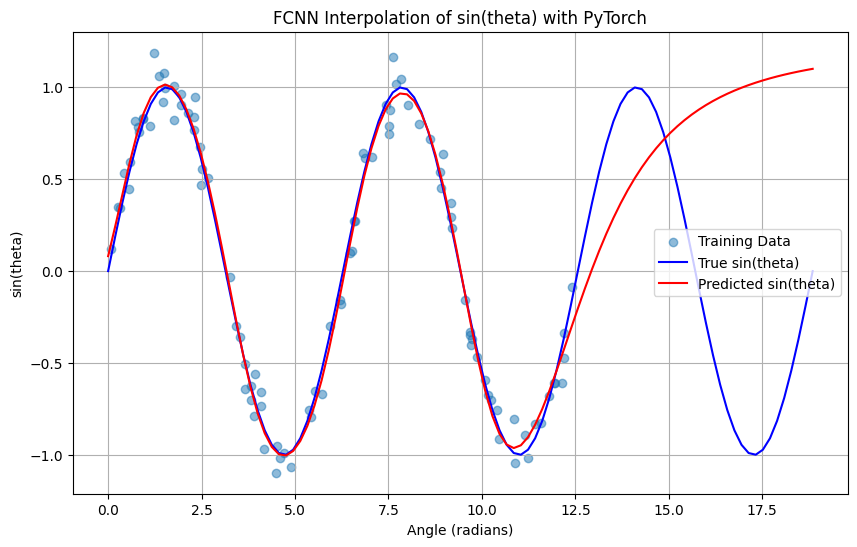

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import gc

# 1. Generate synthetic data for training
np.random.seed(42)
torch.manual_seed(42)

num_samples = 100
angles_train_np = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1)
sin_values_train_np = np.sin(angles_train_np)
noise = np.random.normal(0, 0.1, sin_values_train_np.shape)
sin_values_train_np += noise


angles_train = torch.tensor(angles_train_np, dtype=torch.float32)
sin_values_train = torch.tensor(sin_values_train_np, dtype=torch.float32)

# 2. Define the Fully Connected Neural Network (FCNN) model
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 15),
            nn.Tanh(),
            nn.Linear(15, 15),
            nn.Tanh(),
            nn.Linear(15, 15),
            nn.Tanh(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.net(x)

# make model
model = FCNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 3. Treine the model
num_epochs = 1000 
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(angles_train)
    loss = criterion(outputs, sin_values_train)
    loss.backward()
    optimizer.step()

   
    if (epoch+1) % 200 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

    
    del outputs, loss
    gc.collect()

# 4. Generate test data
num_test_samples = 100
angles_test_np = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true_np = np.sin(angles_test_np)
angles_test = torch.tensor(angles_test_np, dtype=torch.float32)

# 5. make predictions
model.eval()
with torch.no_grad():
    sin_values_predicted = model(angles_test).detach().numpy()

# 6. Avalie the model
mse = np.mean((sin_values_true_np - sin_values_predicted)**2)
print(f"Mean Squared Error on Test Data: {mse:.6f}")

# 7. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(angles_train_np, sin_values_train_np, label='Training Data', alpha=0.5)
plt.plot(angles_test_np, sin_values_true_np, label='True sin(theta)', color='blue')
plt.plot(angles_test_np, sin_values_predicted, label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta) with PyTorch')
plt.legend()
plt.grid(True)
plt.show()
